# Assignment 2: Oja rule
Solve the same assignment as “Assignment 1,” but using the Oja learning rule (play a bit with the alpha values, then chose only one setting). The same output as in “Assignment 1” is due.

# Bonus Track Assignment 2 – Covariance Rule
Solve the same assignment as “Assignment 1,” but using Hebbian learning implemented using the covariance rule. The same output as in “Assignment 1” is due.

## Libraries

In [1]:
import pandas as pd
import numpy as np

from copy import copy
from numpy import ndarray

from matplotlib import pyplot as plt

from LAB2_1.Assignments.Hebbian_utils import principal_components, plot_results
from LAB2_1.Assignments.HebbianLearning import Hebbian_learning

In [2]:
class Oja_rule(Hebbian_learning):
    def __init__(self, alpha:float, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha

    def _hebbian_rule(self, u:ndarray)->ndarray:
        v =  self.W @ u
        return (v * u) - self.alpha * (np.power(v, 2) * self.W)

## Retrieve the dateset

In [3]:
source1 = pd.read_csv("./../../Sources/lab2_1_data.csv", header=None).to_numpy()
first_pc, second_pc = principal_components(source1)

## Assignment 2: Oja rule

### Configuration 1

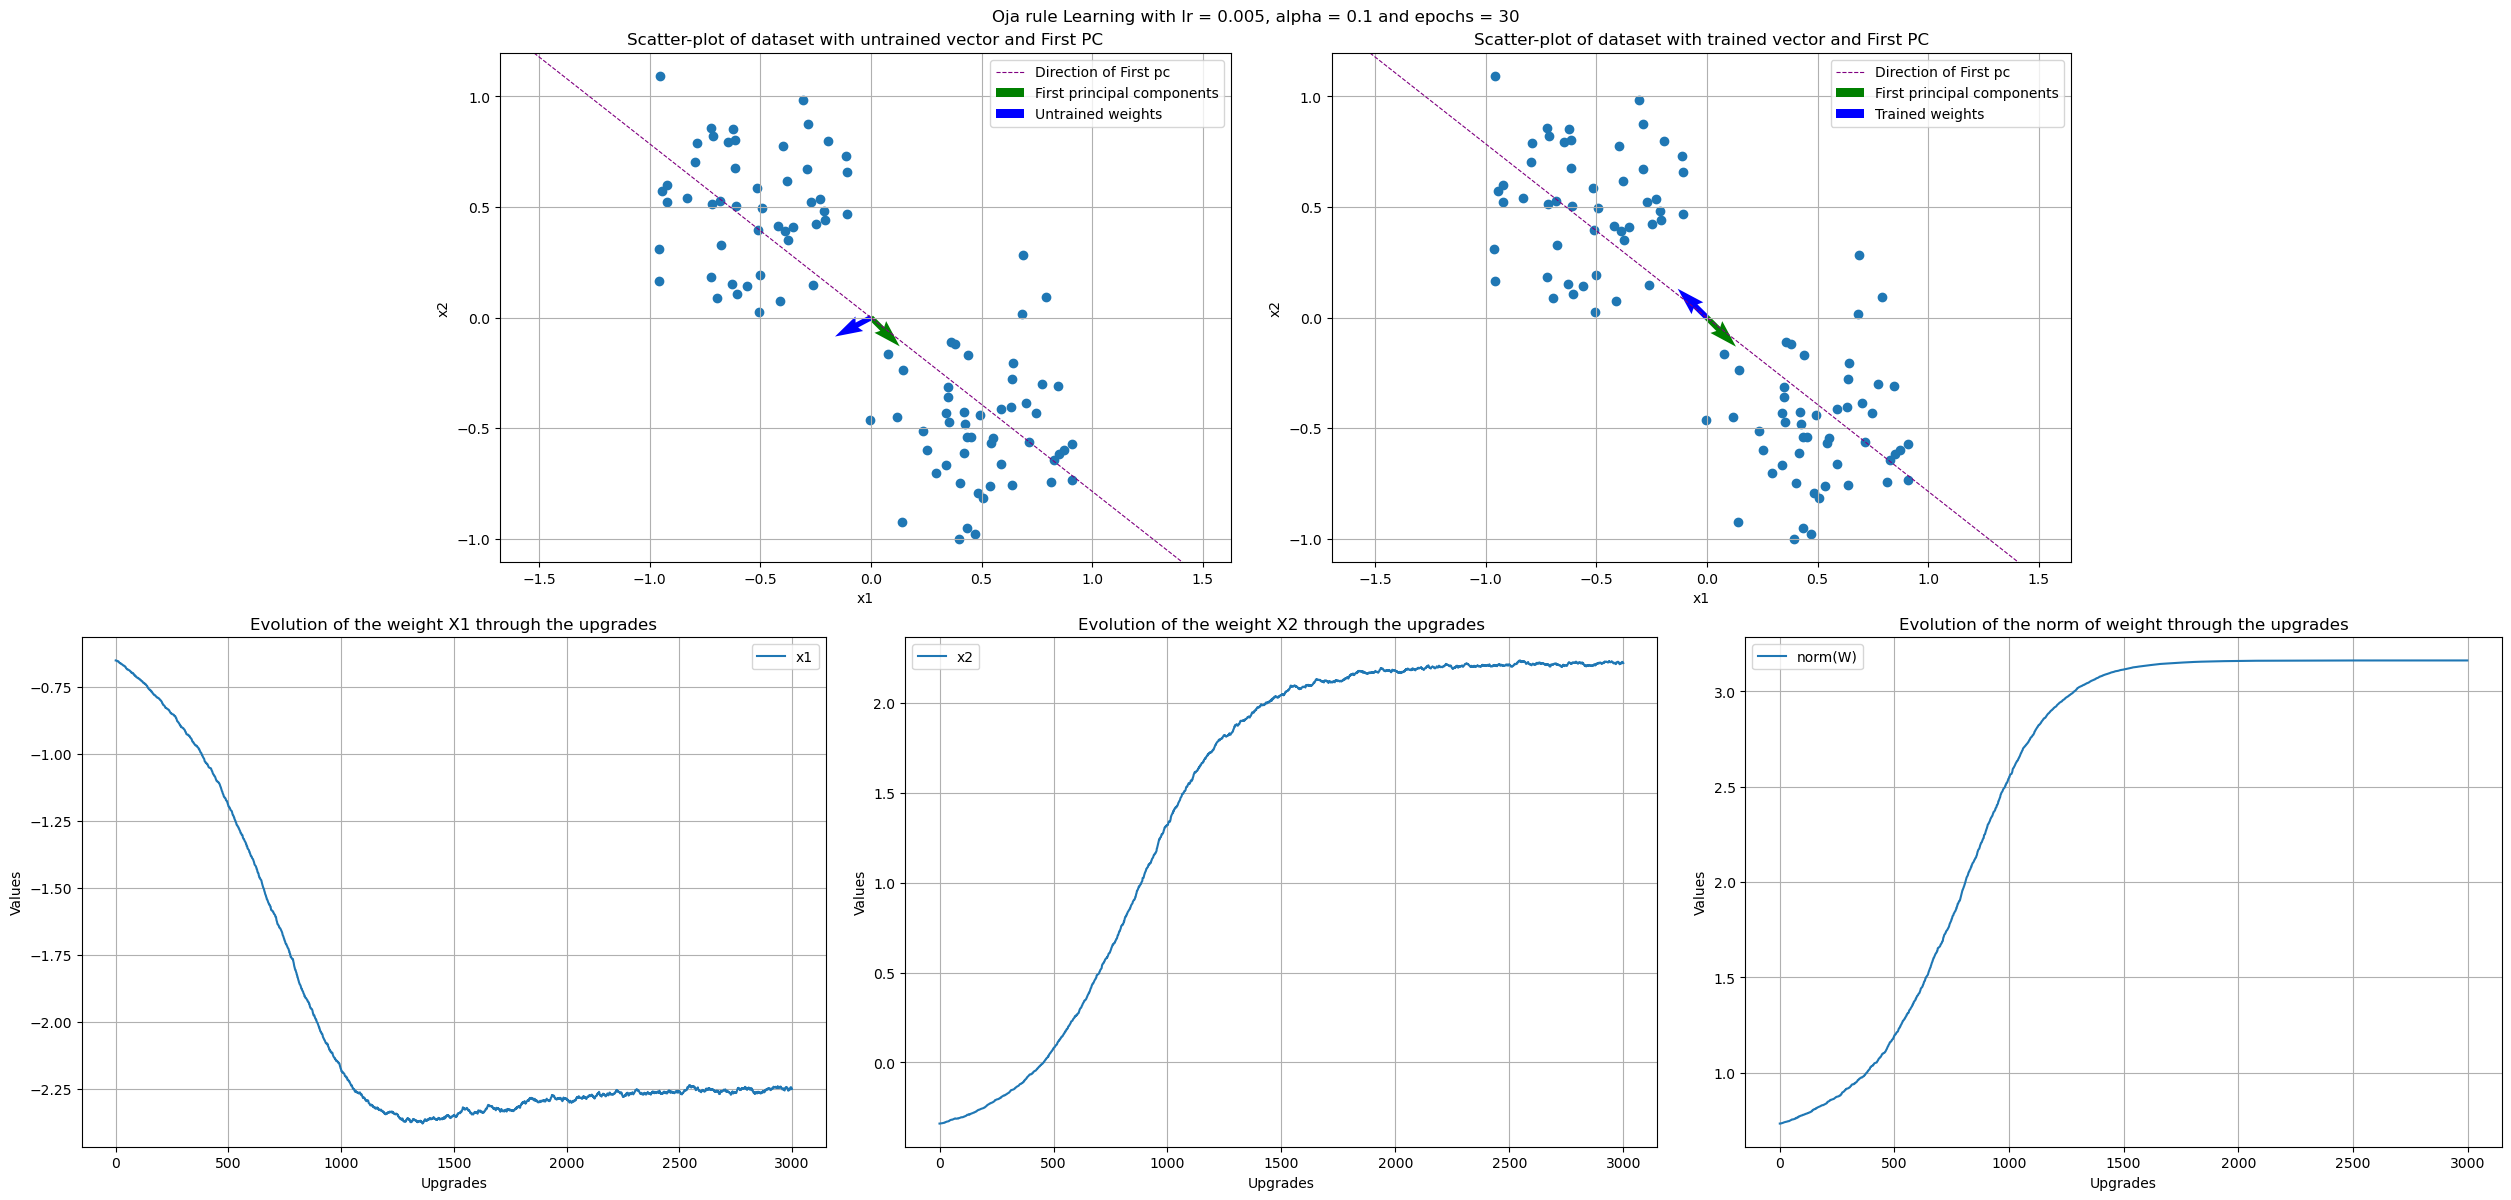

In [4]:
oja_rule = Oja_rule(alpha = 0.1, source = source1.T, lr=0.005, epochs=30)
untrained_W = copy(oja_rule.W)
oja_rule()

plot_results(
    "Oja rule Learning with lr = 0.005, alpha = 0.1 and epochs = 30",
    source1,
    untrained_W,
    oja_rule.W,
    oja_rule.history_x1,
    oja_rule.history_x2,
    first_pc=first_pc,
    filename="02 - Oja rule lr 0_005 epochs 30 alpha 0_1")

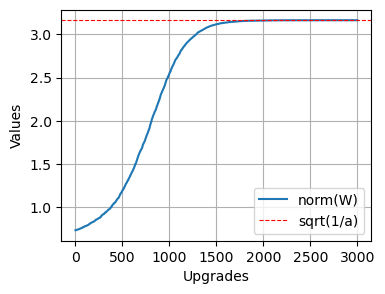

In [5]:
alpha = 0.1
plt.figure(figsize=(4,3))
plt.plot([np.linalg.norm(np.array([a,b])) for (a,b) in zip(oja_rule.history_x1, oja_rule.history_x2)], label="norm(W)")
plt.axhline(y = np.sqrt(1/alpha), color="red", label="sqrt(1/a)", lw=0.8, ls="--")
plt.xlabel("Upgrades")
plt.ylabel("Values")
plt.grid()
plt.legend()
plt.show()

### Configuration 2

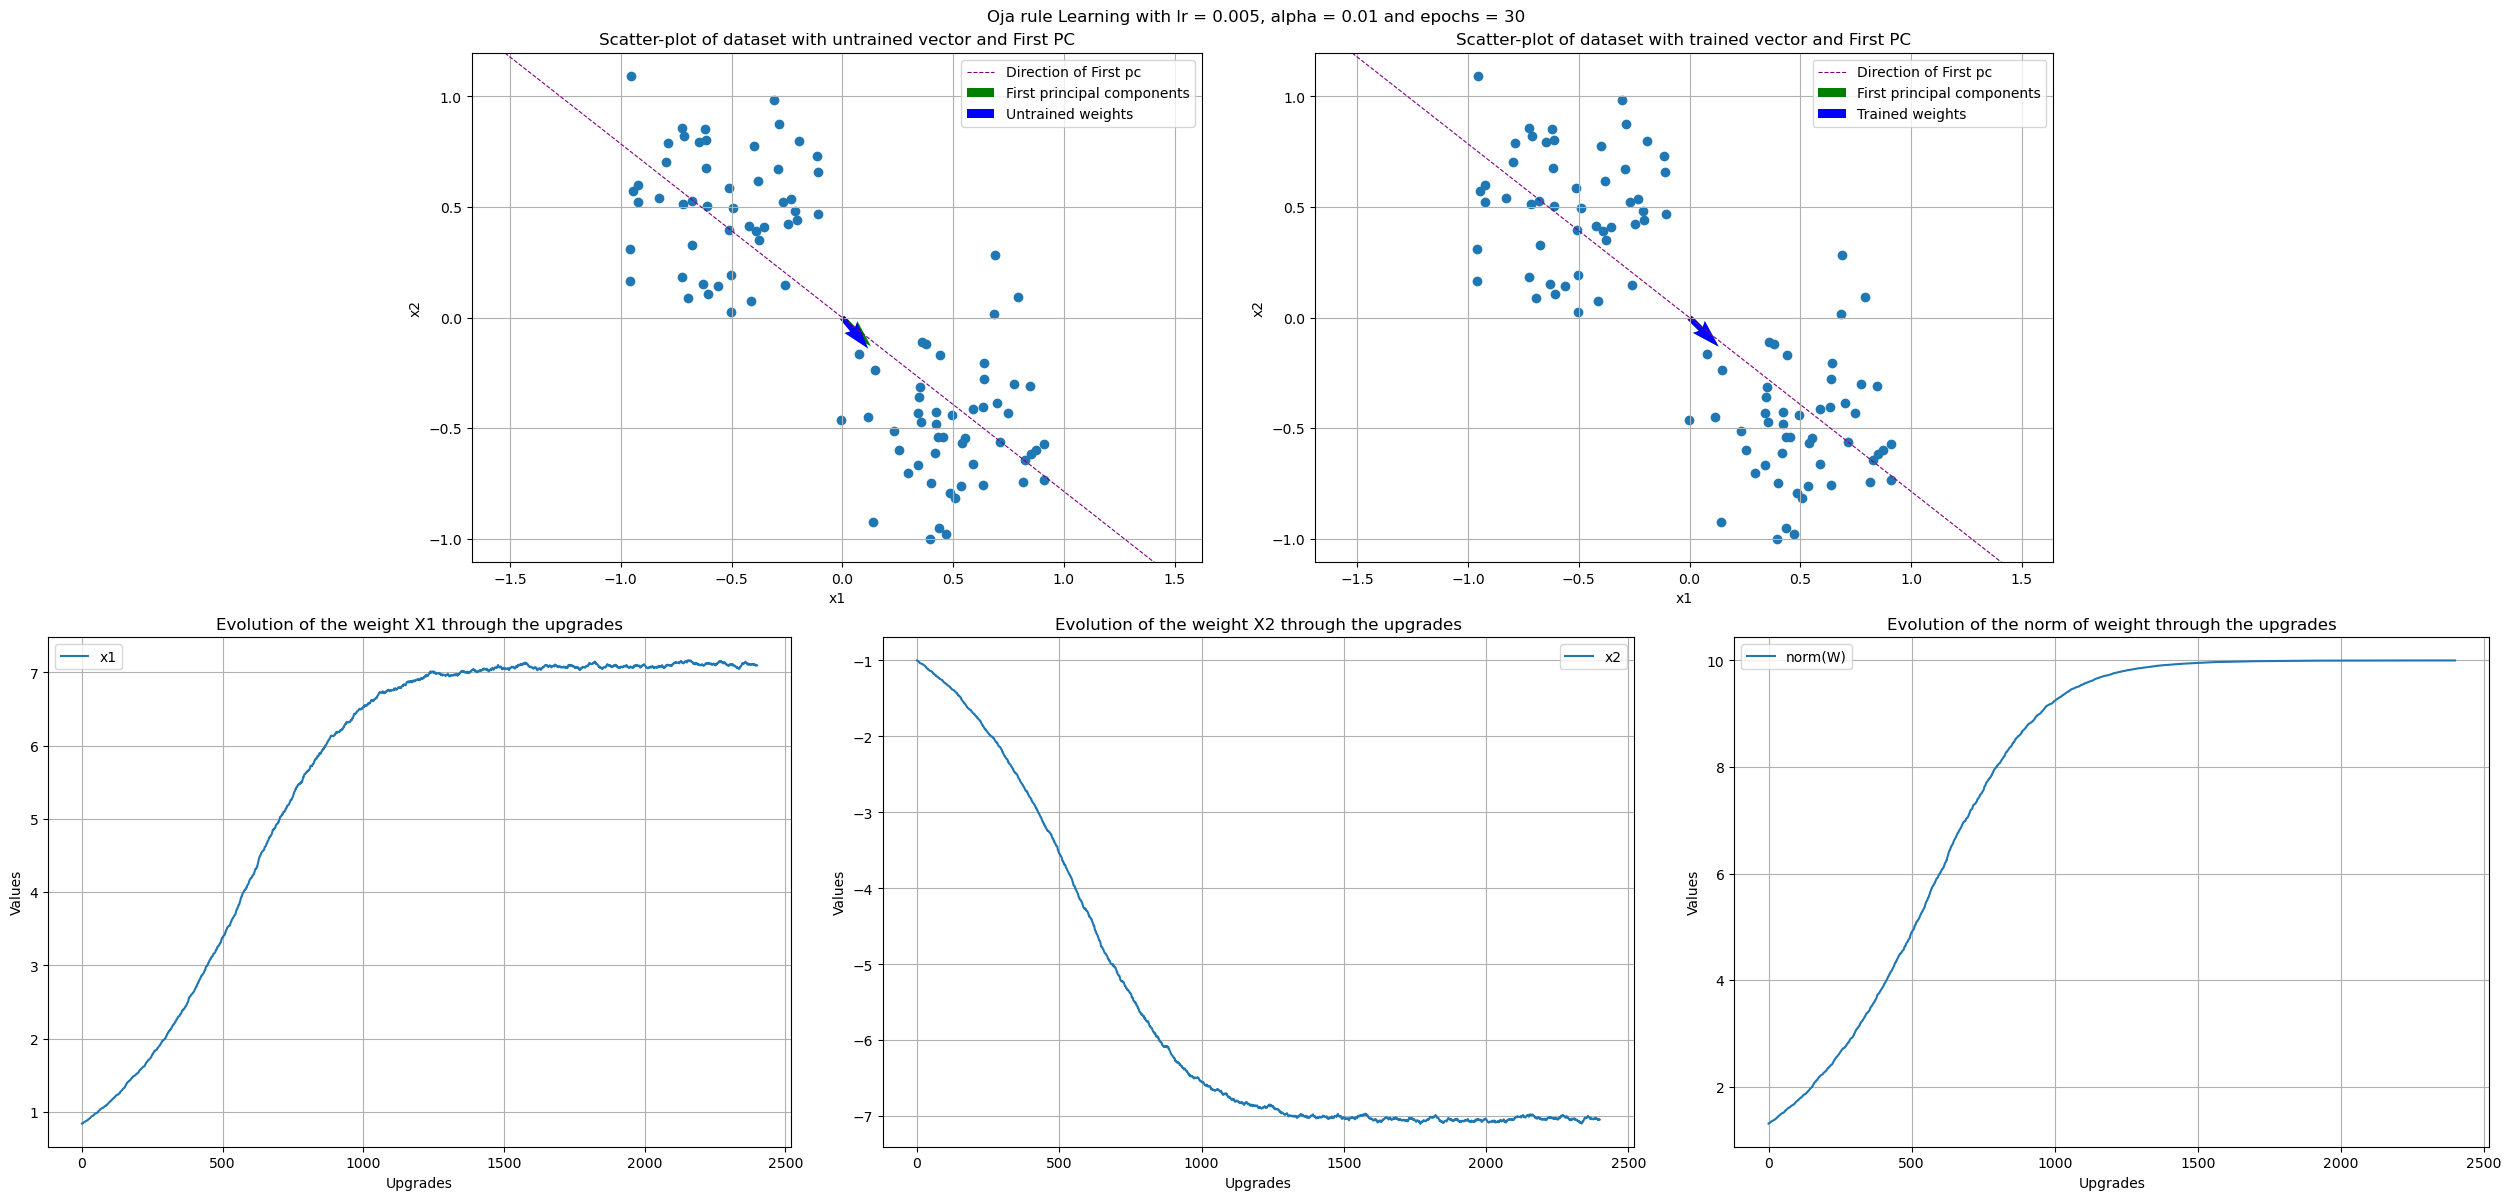

In [6]:
oja_rule = Oja_rule(alpha = 0.01, source = source1.T, lr=0.005, epochs=30)
untrained_W = copy(oja_rule.W)
oja_rule()

plot_results(
    "Oja rule Learning with lr = 0.005, alpha = 0.01 and epochs = 30",
    source1,
    untrained_W,
    oja_rule.W,
    oja_rule.history_x1,
    oja_rule.history_x2,
    first_pc=first_pc,
    filename="03 - Oja rule lr 0_005 epochs 30 alpha 0_01")

## Configuration 3

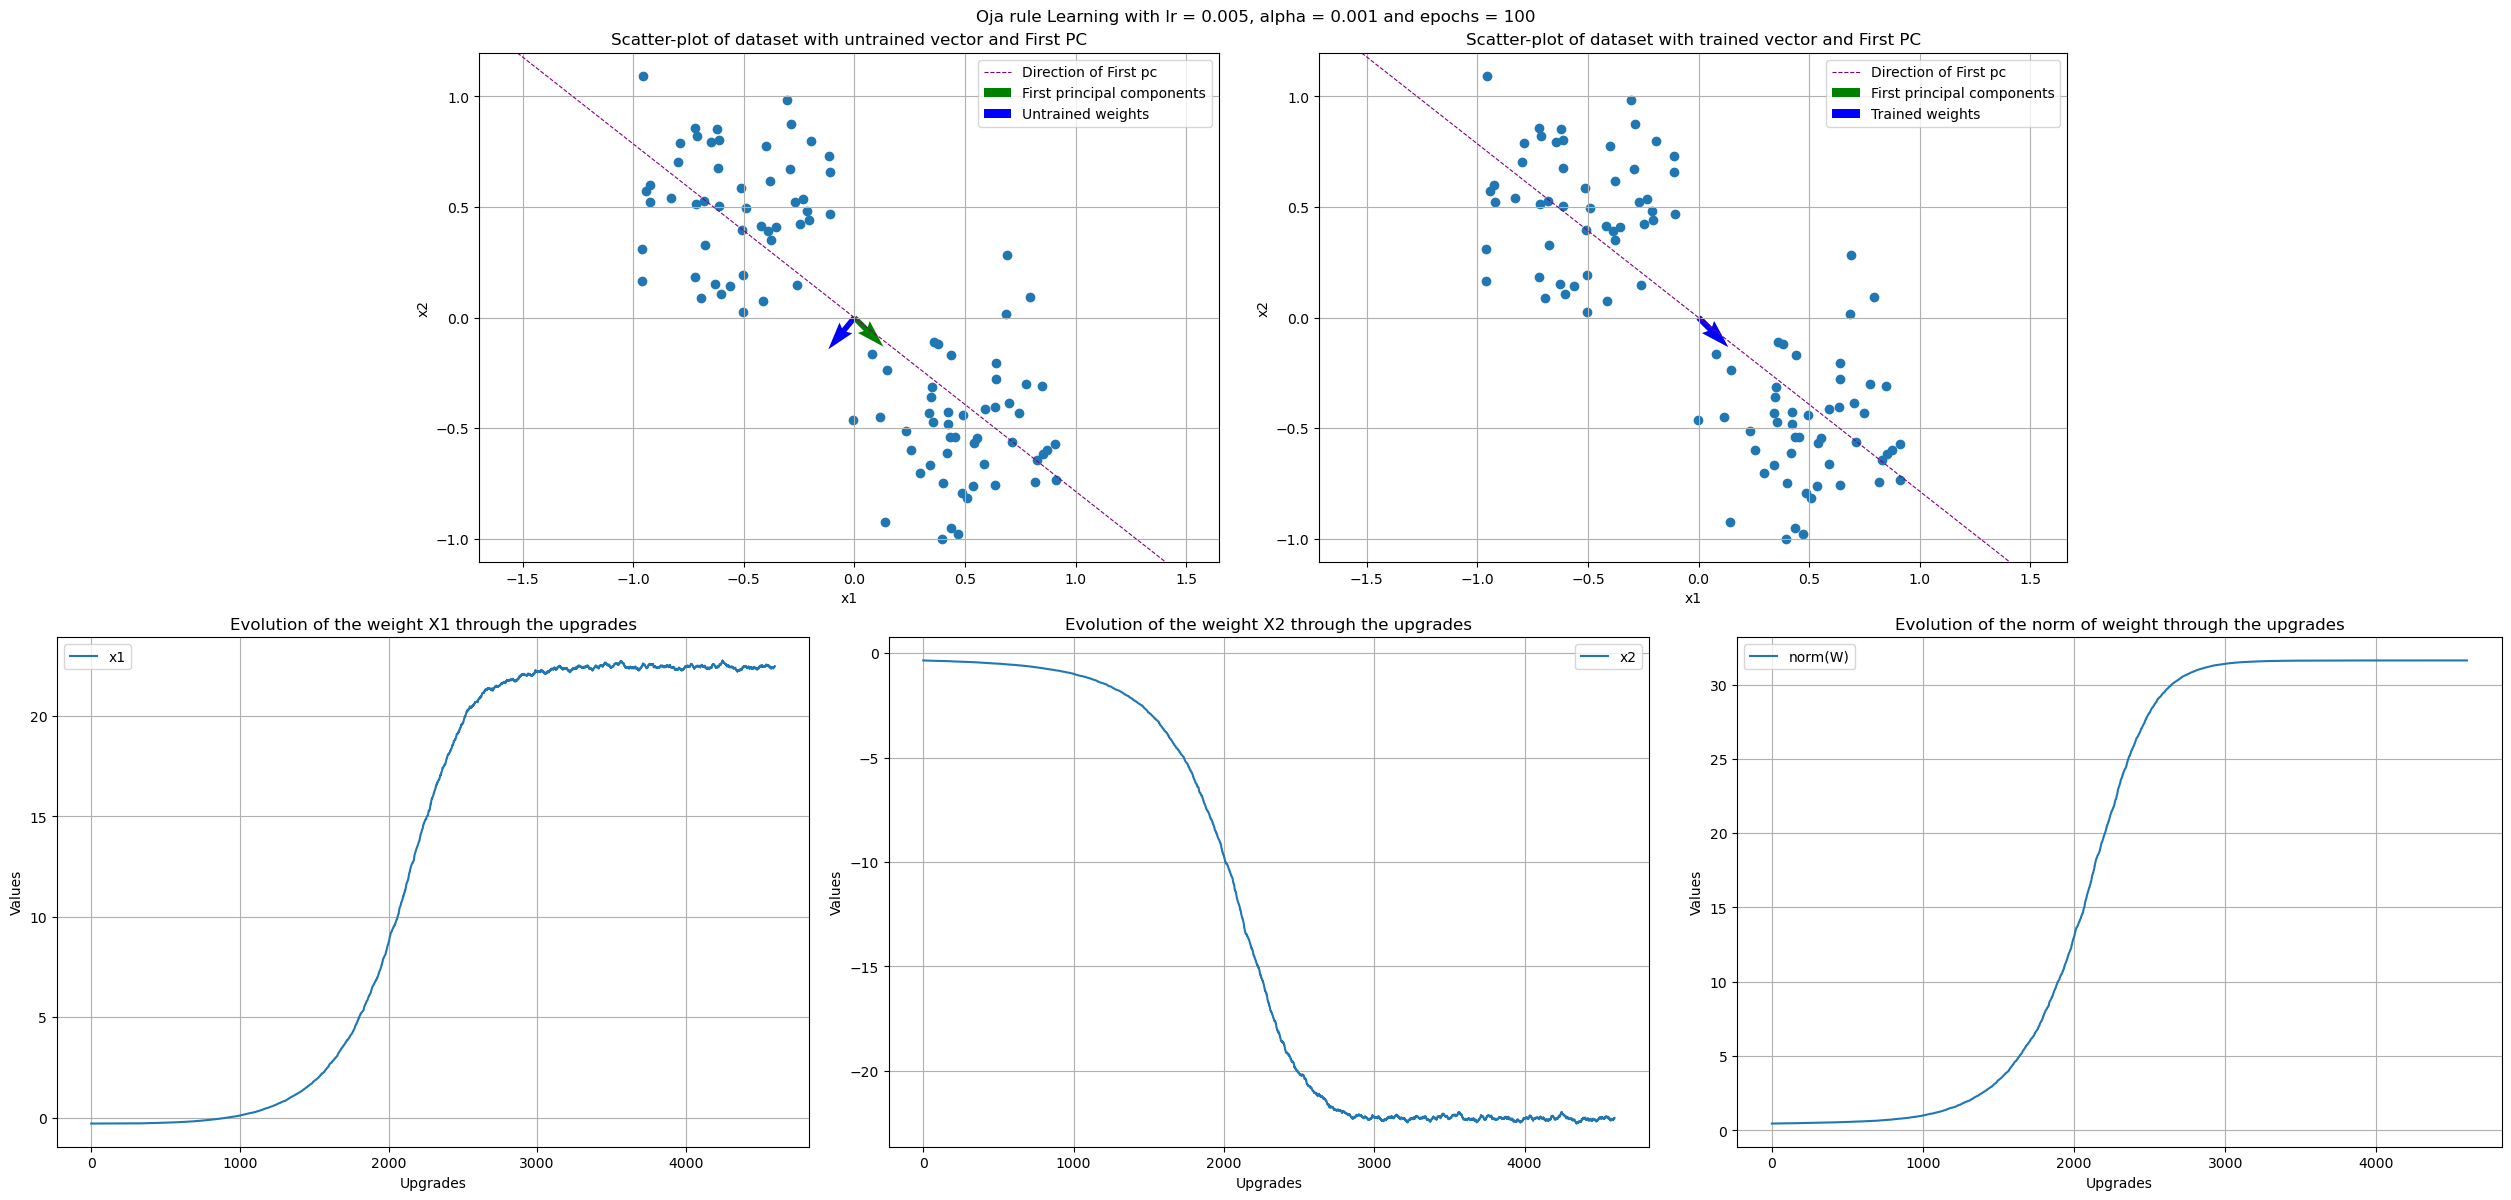

In [7]:
oja_rule = Oja_rule(alpha = 0.001, source = source1.T, lr=0.005, epochs=100)
untrained_W = copy(oja_rule.W)
oja_rule()

plot_results(
    "Oja rule Learning with lr = 0.005, alpha = 0.001 and epochs = 100",
    source1,
    untrained_W,
    oja_rule.W,
    oja_rule.history_x1,
    oja_rule.history_x2,
    first_pc=first_pc,
    filename="04 - Oja rule lr 0_005 epochs 100 alpha 0_001")